In [1]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()
bike = pd.read_csv('day.csv')

In [3]:
bike.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


In [5]:
data = Data.sample(n=30).reset_index() 

In [6]:
N= data.shape[0]
test = np.random.choice(np.arange(N),20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(10, 3) (20, 3)


In [7]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def mse_train(value):
    poly = PolynomialFeatures(degree=value)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    lin2 = LinearRegression(fit_intercept=False)
    lin_fit=lin2.fit(X_train_poly, y_train)
    y_predict = lin_fit.predict(X_train_poly)
    from sklearn.metrics import mean_squared_error as ms
    import math
    y_predict_test = lin_fit.predict(X_test_poly)
    math.log(math.sqrt(ms(y_test, y_predict_test)))
    return [math.log(math.sqrt(ms(y_train, y_predict))),math.log(math.sqrt(ms(y_test, y_predict_test)))]
mse_train(7)

[6.400786298556975, 7.618311761563484]

In [10]:
mse_train(3)[0]

6.952980940752648

In [11]:
A=np.array([mse_train(1)[0]])
for i in range(2,15):
    A=np.append(A,mse_train(i)[0])
A

B=np.array([mse_train(1)[1]])
for i in range(2,15):
    B=np.append(B,mse_train(i)[1])
B

array([7.704, 7.688, 7.764, 7.746, 7.709, 7.681, 7.618, 7.615, 8.715,
       8.906, 9.096, 9.28 , 9.458, 9.626])

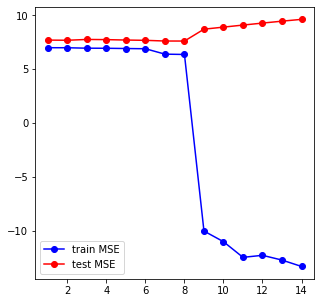

In [12]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(1,15),A,linestyle='-', color='b', 
        marker='o',label='train MSE')
ax1.legend()
ax1.plot(range(1,15),B,linestyle='-', color='r', 
        marker='o',label='test MSE')
ax1.legend()